# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv](https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive-beta.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
# spam (1) or not (0)
data = pd.read_csv("https://static.bc-edx.com/mbc/ai/m4/datasets/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I predict the Random Forest Classifier to do better than the Logistic Regression model. Due to the large number of features in the data, the random forest might do a better job with some feature selection and reducing the noise from variables that are less important. There will be a higher chance of overfitting, with higher false and true positives.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`
y = data['spam']
X = data.copy()
X.drop('spam', axis=1, inplace=True)

In [6]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [7]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [12]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [13]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [15]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [52]:
# Train a Logistic Regression model and print the model score. 
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1, max_iter=78) #model did not improve with more iterations
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

In [53]:
# Make and save testing predictions with the saved logistic regression model using the test data. 
predictions =  lr_model.predict(X_test_scaled)

# Review the predictions
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`. 0.9270199826238054
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9226759339704604


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [55]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=78, random_state=1)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [56]:
# Make and save testing predictions with the saved logistic regression model using the test data
rf_pred = rf_model.predict(X_test_scaled)

# Review the predictions
rf_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
acc_score = accuracy_score(y_test, rf_pred)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9565595134665508


In [58]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.12154696318594702, 'char_freq_$'),
 (0.09915448830098023, 'char_freq_!'),
 (0.08129250565573794, 'word_freq_remove'),
 (0.07309667419672762, 'capital_run_length_average'),
 (0.06110406036422482, 'word_freq_free'),
 (0.060497598039711345, 'capital_run_length_longest'),
 (0.04879169877198372, 'word_freq_your'),
 (0.04488107251587297, 'word_freq_hp'),
 (0.03806864230495499, 'capital_run_length_total'),
 (0.03311505421836174, 'word_freq_you')]

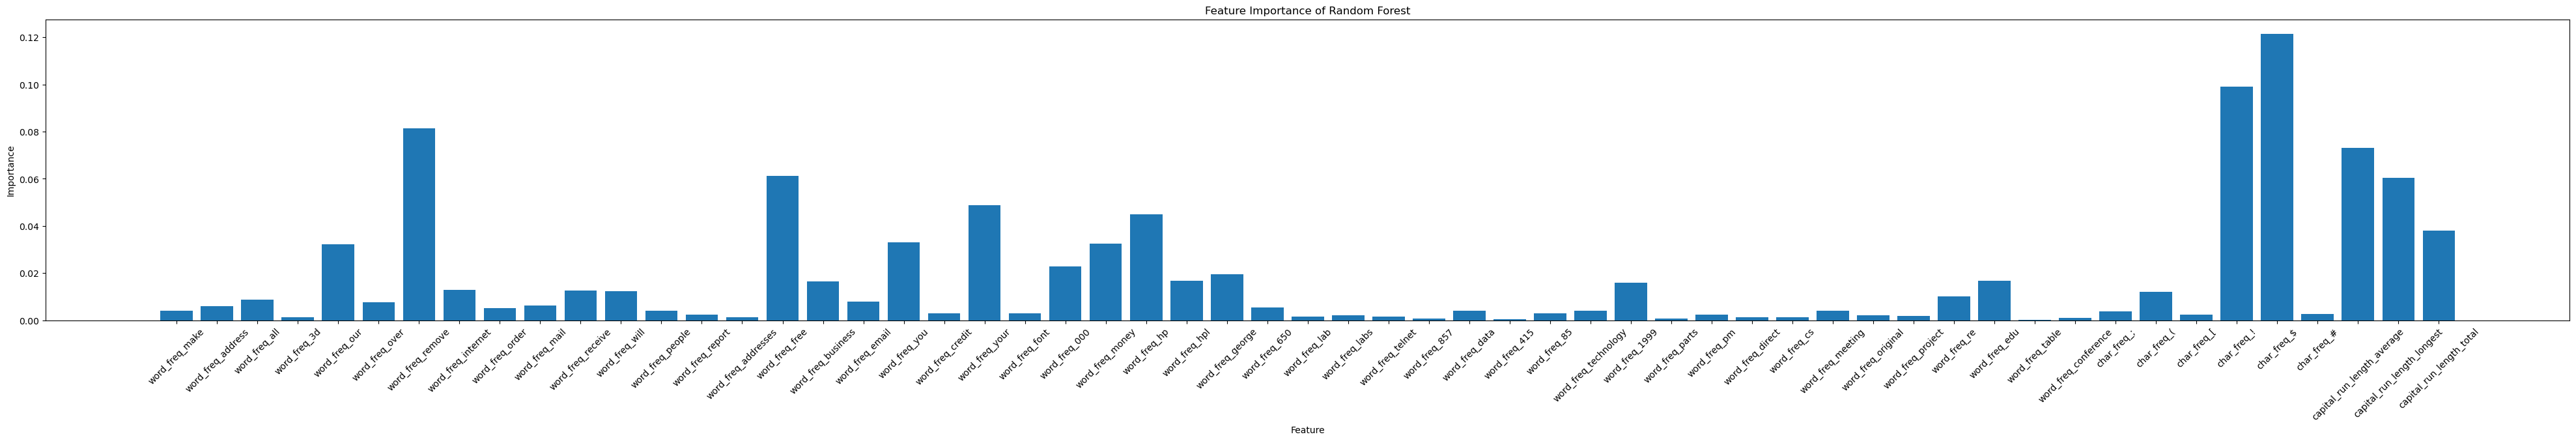

In [59]:
# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 6))
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest')
plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

The random forest preformed better, which is as I predicted. This is likely due to a large number of noisy variables. The most important features include characters ! and $, which makes sense that they would be repeated frequently in spam emails. 